# ニューラルネットワークのクラス分類をしてみよう

## TensorFlowとkerasをインポートしよう（Colaboratoryでは不要）

In [1]:
# # TensorFlow と tf.keras のインポート
# import tensorflow as tf
# from tensorflow import keras

In [2]:
# print(tf.version.VERSION)
# print(tf.keras.__version__)

## 学習に使用するデータを整理しよう

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("dataset.csv")
data.head()

,debora,Woman,46,1.62,75,28.6,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
0,debora,Woman,46,1.62,75,28.6,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
1,debora,Woman,46,1.62,75,28.6,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
2,debora,Woman,46,1.62,75,28.6,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
3,debora,Woman,46,1.62,75,28.6,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting
4,debora,Woman,46,1.62,75,28.6,-2,95,-62,-14,19,-16,-13,104,-89,-153,-104,-142,sitting


## 利用するセルのみ指定して読み込み


In [7]:
df = pd.read_csv("dataset.csv", header=None,usecols=[6,7,8,9,10,11,12,13,14,15,16,17,18], encoding='UTF-8')

df

,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165625,-6,96,-142,-2,91,-103,14,121,-102,-194,-78,-156,walking
165626,-13,94,-150,-13,88,-98,16,120,-99,-194,-79,-157,walking
165627,2,93,-148,-8,88,-100,15,120,-100,-189,-77,-160,walking
165628,-1,94,-147,-17,87,-99,17,121,-99,-190,-78,-158,walking


## ラベルの文字列を数字に置き換え

In [8]:
# 目的変数の数値変換
df[18] = df[18].map({"sitting": 0, "standing": 1, "standup": 2, "sitdown": 3, "walking": 4})
df

,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,0
1,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,0
2,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,0
3,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,0
4,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165625,-6,96,-142,-2,91,-103,14,121,-102,-194,-78,-156,4
165626,-13,94,-150,-13,88,-98,16,120,-99,-194,-79,-157,4
165627,2,93,-148,-8,88,-100,15,120,-100,-189,-77,-160,4
165628,-1,94,-147,-17,87,-99,17,121,-99,-190,-78,-158,4


## 学習データとラベルデータに分割

In [9]:
train = df.iloc[:, :12]
label = df.iloc[: , 12]

label

0         0
1         0
2         0
3         0
4         0
         ..
165625    4
165626    4
165627    4
165628    4
165629    4
Name: 18, Length: 165630, dtype: int64

## Numpy形式に変更

In [10]:
# Numpy形式に変更
train = train.values
label = label.values

In [11]:
type(train),type(label)

(numpy.ndarray, numpy.ndarray)

## 学習データとテストデータに分割

In [12]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_label,test_label = train_test_split(train ,label ,train_size = 0.7, random_state=0)
# random_state 乱数の種類を指定しておくことで、改良したときに正しく評価するため

In [13]:
train_label

array([0, 2, 4, ..., 4, 2, 0])

In [14]:
len(train_data),len(test_data),len(train_label),len(test_label)

(115940, 49690, 115940, 49690)

## 【課題設定箇所】ニューラルネットワークを定義

In [15]:
from tensorflow.keras import models,layers

# モデルのインスタンス化
model = models.Sequential()

model.add(layers.Dense(500,activation='relu',kernel_initializer='he_normal',input_shape=(12,)))
model.add(layers.Dense(500,activation='relu',kernel_initializer='he_normal'))
model.add(layers.Dense(500,activation='relu',kernel_initializer='he_normal'))
model.add(layers.Dense(5,activation='softmax'))

## 最適化アルゴリズム、損失関数、評価関数を定義

In [16]:
# モデルのコンパイル
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## 【課題設定箇所】学習を実行

In [17]:
# 学習の実行
history = model.fit(train_data, train_label, batch_size=10000, epochs=300, verbose=2,
                   validation_data=(test_data, test_label))

Epoch 1/300
12/12 - 0s - loss: 176.0195 - accuracy: 0.4658 - val_loss: 63.6075 - val_accuracy: 0.6989
Epoch 2/300
12/12 - 0s - loss: 32.2362 - accuracy: 0.6691 - val_loss: 16.6014 - val_accuracy: 0.5659
Epoch 3/300
12/12 - 0s - loss: 10.9003 - accuracy: 0.7502 - val_loss: 7.8677 - val_accuracy: 0.7045
Epoch 4/300
12/12 - 0s - loss: 4.3465 - accuracy: 0.8186 - val_loss: 2.7843 - val_accuracy: 0.8663
Epoch 5/300
12/12 - 0s - loss: 2.0437 - accuracy: 0.8805 - val_loss: 1.4091 - val_accuracy: 0.8905
Epoch 6/300
12/12 - 0s - loss: 1.1370 - accuracy: 0.9020 - val_loss: 0.9647 - val_accuracy: 0.9184
Epoch 7/300
12/12 - 0s - loss: 0.7642 - accuracy: 0.9279 - val_loss: 0.7019 - val_accuracy: 0.9317
Epoch 8/300
12/12 - 0s - loss: 0.5845 - accuracy: 0.9367 - val_loss: 0.5198 - val_accuracy: 0.9415
Epoch 9/300
12/12 - 0s - loss: 0.4644 - accuracy: 0.9421 - val_loss: 0.4426 - val_accuracy: 0.9482
Epoch 10/300
12/12 - 0s - loss: 0.3627 - accuracy: 0.9512 - val_loss: 0.3530 - val_accuracy: 0.9545
Epo

## 結果を表形式に保存

In [18]:
result = pd.DataFrame(history.history)
result

,loss,accuracy,val_loss,val_accuracy
0,176.019485,0.465836,63.607536,0.698873
1,32.236233,0.669122,16.601372,0.565949
2,10.900345,0.750190,7.867694,0.704488
3,4.346469,0.818579,2.784290,0.866331
4,2.043667,0.880507,1.409082,0.890481
...,...,...,...,...
295,0.016144,0.995058,0.045360,0.989595
296,0.016706,0.994808,0.042067,0.991185
297,0.015869,0.995334,0.042121,0.990984
298,0.016111,0.995386,0.042140,0.990682


## グラフ描画

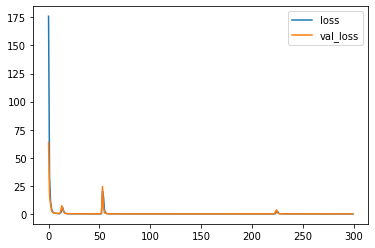

In [19]:
result[['loss','val_loss']].plot()